<a href="https://colab.research.google.com/github/PedroMontano/Chebyshev_Center_Tutorial/blob/main/PMF_WEEK_DAY_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Arrumando Bugs

In [ ]:
#1º Passo
!pip uninstall matplotlib
!pip install matplotlib

Found existing installation: matplotlib 3.6.3
Uninstalling matplotlib-3.6.3:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)


In [ ]:
#2º passo
exit()

In [ ]:
#3º passo
!pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#4º passo
!pip install pybind11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install riskfolio-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 19.9 MB/s eta 0:00:00
  Created wheel for riskfolio-lib: filename=Riskfolio_Lib-4.0.3-cp38-cp38-linux_x86_64.whl size=178303 sha256=c88b3f98a8c16b79ca24422c8fa0a2a65733763e26519c4ce21c8393bddad21f
  Stored in directory: /root/.cache/pip/wheels/86/05/4c/6a409ccea0f00dff448de87740642853c31a65168aec0968de
Successfully built riskfolio-lib


In [ ]:
#Importação das bibliotecas

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import riskfolio as rp
warnings.filterwarnings('ignore')

In [ ]:
#In sample


#Período
inicio = '2016-01-01'
fim = '2022-08-30'

#Seleção dos ativos da carteira
ativos = ['PETR4.SA','VALE3.SA', 'BBDC4.SA','ITSA4.SA', 'ABEV3.SA' ,'WEGE3.SA', 'IVVB11.SA']

#Peso da carteira anteriormente

peso_in = np.array([0.15,0.15,0.15,0.15,0.15,0.15,0.10])

In [ ]:
#Download dos dados

carteira = yf.download(ativos, start=inicio, end=fim)['Adj Close']
carteira.head()

[*********************100%***********************]  7 of 7 completed


,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2016-01-04 00:00:00-02:00,13.508917,6.395194,3.078626,83.110001,3.027317,8.419853,5.020996
2016-01-05 00:00:00-02:00,13.720855,6.418435,3.129937,83.000000,2.943592,8.307058,5.264498
2016-01-06 00:00:00-02:00,13.587410,6.327462,3.157926,82.099998,2.820208,7.696635,5.144461
2016-01-07 00:00:00-02:00,13.226339,6.199432,3.111277,81.000000,2.758516,7.238818,4.996986
2016-01-08 00:00:00-02:00,13.399026,6.078138,3.111277,80.000000,2.762922,6.993322,4.972979


In [ ]:
#Extração dos parâmetros

#Retornos
retorno_carteira = carteira.pct_change().dropna()

#Covariância
cov_in = retorno_carteira.cov()

In [ ]:
pesos_in = pd.DataFrame(data={'pesos_in':peso_in},index=ativos)
pesos_in

,pesos_in
PETR4.SA,0.15
VALE3.SA,0.15
BBDC4.SA,0.15
ITSA4.SA,0.15
ABEV3.SA,0.15
WEGE3.SA,0.15
IVVB11.SA,0.10


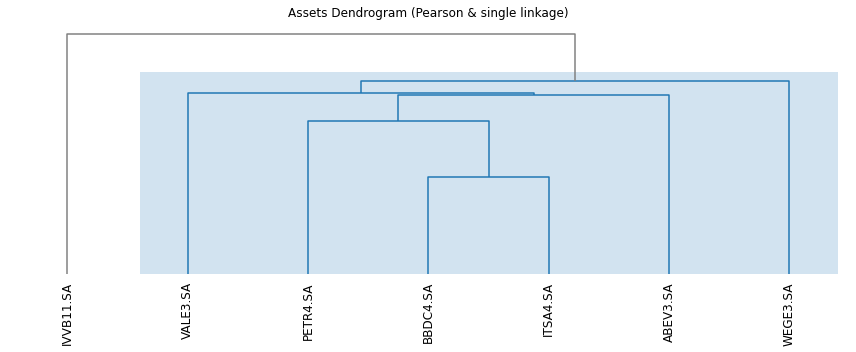

In [ ]:
ax = rp.plot_dendrogram(returns=retorno_carteira,
                      codependence='pearson',
                      linkage='single',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      ax=None)